In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [155]:
df= pd.read_csv("Individual Assignment Dataset.csv", parse_dates= ["Date"], index_col= "Date")
df

,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads
Date,,,,,,,,,,
2017-05-22,Direct,desktop,25-34,female,2380,5605,150245,213,3805044,3
2017-01-23,Direct,desktop,25-34,female,2331,5614,152653,184,3907392,9
2017-01-16,Direct,desktop,25-34,female,2304,5630,152127,202,3903055,6
2017-05-30,Direct,desktop,25-34,female,2302,5295,128093,213,3326628,5
2017-05-08,Direct,desktop,25-34,female,2298,5107,137228,238,3558793,12
...,...,...,...,...,...,...,...,...,...,...
2018-01-30,Paid Search,tablet,45-54,female,10,10,10,9,6,0
2018-01-31,Organic Search,tablet,18-24,female,10,16,230,2,9058,0
2018-01-31,Referral,desktop,65+,male,10,12,34,5,475,0


In [156]:
df.dtypes

Channel            object
Device Category    object
Age                object
Gender             object
Users               int64
Sessions            int64
Pageviews           int64
Bounces             int64
Time on Page        int64
 Leads              int64
dtype: object

In [4]:
df.isna().sum()

Channel            0
Device Category    0
Age                0
Gender             0
Users              0
Sessions           0
Pageviews          0
Bounces            0
Time on Page       0
 Leads             0
dtype: int64

## Total users vs. total leads

In [157]:
df["Conversion rate for users"]= df[" Leads"]/df["Users"]
df["Conversion rate for sessions"]= df[" Leads"]/df["Sessions"]
df["Bounce rate"]= df["Bounces"]/df["Sessions"]
df["Pageviews per session"]= df["Pageviews"]/df["Sessions"]
df

,Channel,Device Category,Age,Gender,Users,Sessions,Pageviews,Bounces,Time on Page,Leads,Conversion rate for users,Conversion rate for sessions,Bounce rate,Pageviews per session
Date,,,,,,,,,,,,,,
2017-05-22,Direct,desktop,25-34,female,2380,5605,150245,213,3805044,3,0.001261,0.000535,0.038002,26.805531
2017-01-23,Direct,desktop,25-34,female,2331,5614,152653,184,3907392,9,0.003861,0.001603,0.032775,27.191486
2017-01-16,Direct,desktop,25-34,female,2304,5630,152127,202,3903055,6,0.002604,0.001066,0.035879,27.020782
2017-05-30,Direct,desktop,25-34,female,2302,5295,128093,213,3326628,5,0.002172,0.000944,0.040227,24.191313
2017-05-08,Direct,desktop,25-34,female,2298,5107,137228,238,3558793,12,0.005222,0.002350,0.046603,26.870570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,Paid Search,tablet,45-54,female,10,10,10,9,6,0,0.000000,0.000000,0.900000,1.000000
2018-01-31,Organic Search,tablet,18-24,female,10,16,230,2,9058,0,0.000000,0.000000,0.125000,14.375000
2018-01-31,Referral,desktop,65+,male,10,12,34,5,475,0,0.000000,0.000000,0.416667,2.833333


## What are the most effective channels?
#### If we are measuring effectiveness along different channels we can take into account this same proportion of total leads vs total users

In [24]:
sns.set(style="darkgrid")

<ipython-input-180-d57abaf3a588>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eff_pchannel= df.groupby("Channel")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()


Text(0.5, 1.0, 'Effectiveness per channel')

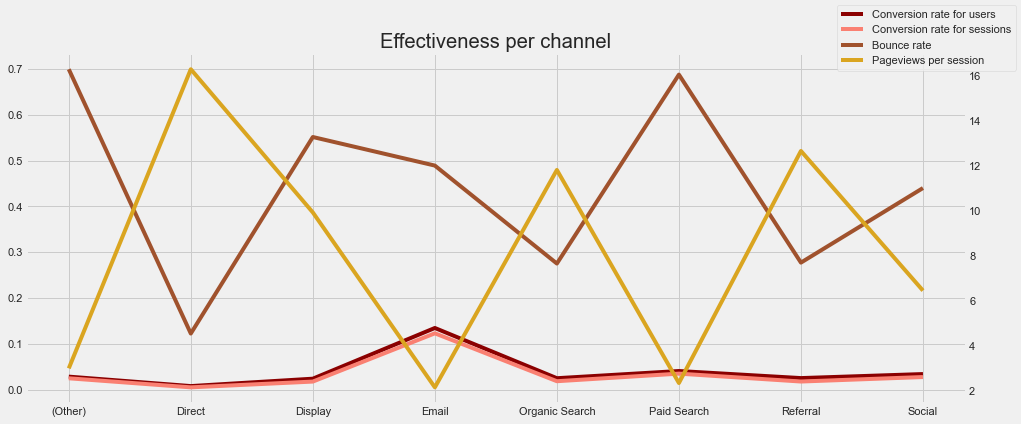

In [180]:
fig, ax1 = plt.subplots(figsize= (15, 6))

eff_pchannel= df.groupby("Channel")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()
ax1.plot(eff_pchannel.iloc[:,0] , label= 'Conversion rate for users', color= 'darkred' )
ax1.plot(eff_pchannel.iloc[:,1] , label= 'Conversion rate for sessions', color= 'salmon')
ax1.plot(eff_pchannel.iloc[:,2] , label= 'Bounce rate', color= 'sienna')
ax2 = ax1.twinx() 
ax2.plot(eff_pchannel.iloc[:,3] , label= 'Pageviews per session', color= 'goldenrod')
plt.style.use("fivethirtyeight")
ax2.grid(False)

fig.legend()
plt.title("Effectiveness per channel")

Search email is currently the channel with the higher effectiveness on leads

## What are the most effective devices?

<ipython-input-181-aa20a55a2d9b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eff_pchannel= df.groupby("Device Category")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()


Text(0.5, 1.0, 'Effectiveness per device')

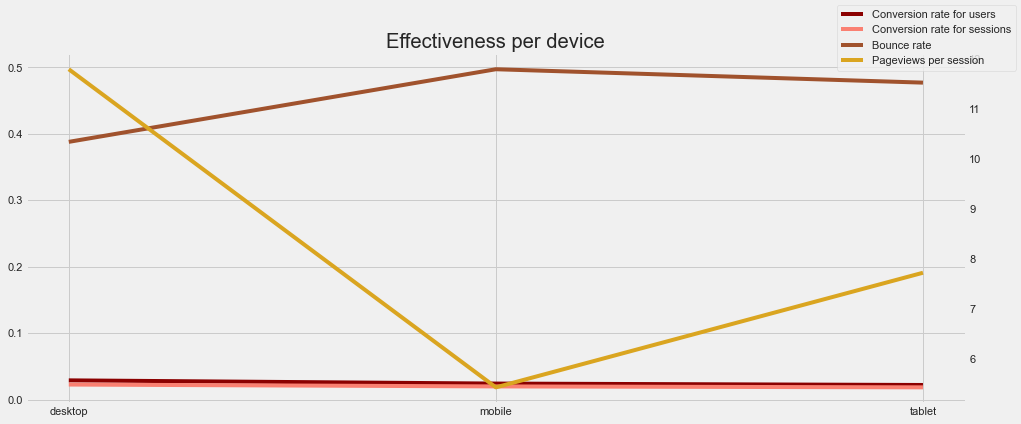

In [181]:
fig, ax1 = plt.subplots(figsize= (15, 6))

eff_pchannel= df.groupby("Device Category")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()
ax1.plot(eff_pchannel.iloc[:,0] , label= 'Conversion rate for users', color= 'darkred' )
ax1.plot(eff_pchannel.iloc[:,1] , label= 'Conversion rate for sessions', color= 'salmon')
ax1.plot(eff_pchannel.iloc[:,2] , label= 'Bounce rate', color= 'sienna')
ax2 = ax1.twinx() 
ax2.plot(eff_pchannel.iloc[:,3] , label= 'Pageviews per session', color= 'goldenrod')
plt.style.use("fivethirtyeight")
ax2.grid(False)

fig.legend()
plt.title("Effectiveness per device")

Search desktop is currently the channel with the higher effectiveness on leads

## What are the most effective age buckets?

<ipython-input-182-8d2760f39ff8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eff_pchannel= df.groupby("Age")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()


Text(0.5, 1.0, 'Effectiveness per Age')

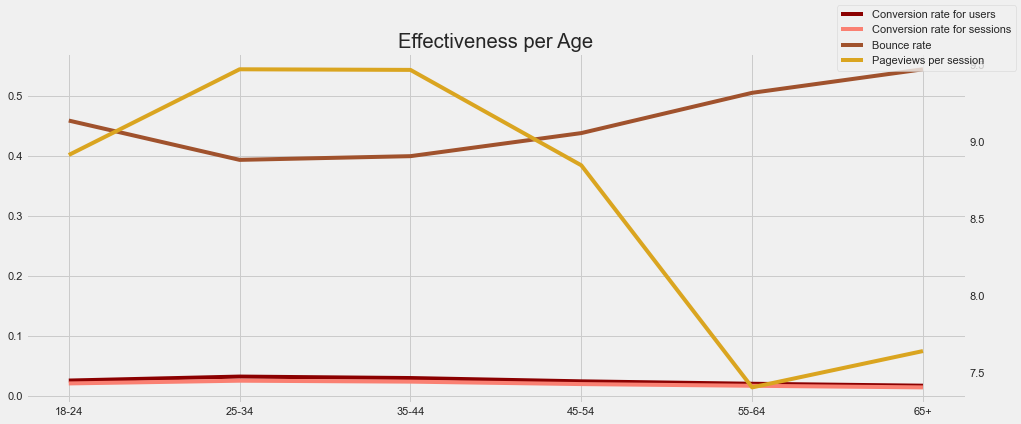

In [182]:
fig, ax1 = plt.subplots(figsize= (15, 6))

eff_pchannel= df.groupby("Age")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()
ax1.plot(eff_pchannel.iloc[:,0] , label= 'Conversion rate for users', color= 'darkred' )
ax1.plot(eff_pchannel.iloc[:,1] , label= 'Conversion rate for sessions', color= 'salmon')
ax1.plot(eff_pchannel.iloc[:,2] , label= 'Bounce rate', color= 'sienna')
ax2 = ax1.twinx() 
ax2.plot(eff_pchannel.iloc[:,3] , label= 'Pageviews per session', color= 'goldenrod')
plt.style.use("fivethirtyeight")
ax2.grid(False)

fig.legend()
plt.title("Effectiveness per Age")

<ipython-input-183-c15b97903343>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  eff_pchannel= df.groupby("Gender")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()


Text(0.5, 1.0, 'Effectiveness per gender')

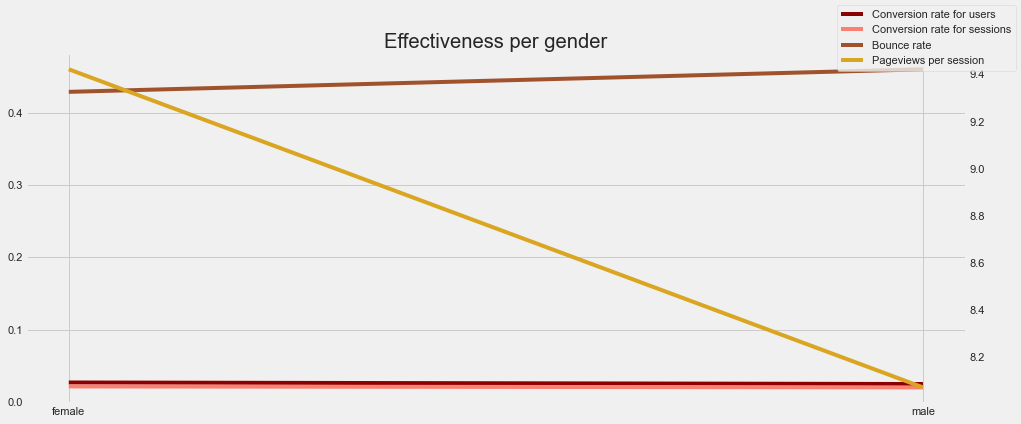

In [183]:
fig, ax1 = plt.subplots(figsize= (15, 6))

eff_pchannel= df.groupby("Gender")["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session"].mean()
ax1.plot(eff_pchannel.iloc[:,0] , label= 'Conversion rate for users', color= 'darkred' )
ax1.plot(eff_pchannel.iloc[:,1] , label= 'Conversion rate for sessions', color= 'salmon')
ax1.plot(eff_pchannel.iloc[:,2] , label= 'Bounce rate', color= 'sienna')
ax2 = ax1.twinx() 
ax2.plot(eff_pchannel.iloc[:,3] , label= 'Pageviews per session', color= 'goldenrod')
plt.style.use("fivethirtyeight")
ax2.grid(False)

fig.legend()
plt.title("Effectiveness per gender")

## How to differentiate the customers in out database

In [81]:
#Encode categorical
df['Channel'] = df.Channel.astype('category')
df['Device Category'] = df['Device Category'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df.dtypes

Channel                         category
Device Category                 category
Age                             category
Gender                          category
Users                              int64
Sessions                           int64
Pageviews                          int64
Bounces                            int64
Time on Page                       int64
 Leads                             int64
Effectiveness leads/ users       float64
Conversion rate for users        float64
Conversion rate for sessions     float64
Bounce rate                      float64
Pageviews per session            float64
dtype: object

In [74]:
categorical = df.columns[df.dtypes=='category'].tolist()
numerical = df.columns[df.dtypes!='category'].tolist()
numerical.remove(' Leads')
numerical.remove('Effectiveness leads/ users')
X= df.drop(columns=['Users', 'Sessions',
       'Pageviews', 'Bounces', 'Time on Page', ' Leads',
       'Effectiveness leads/ users', 'Conversion rate for users',
       'Conversion rate for sessions', 'Bounce rate', 'Pageviews per session'])

In [130]:
ct_numerical= ColumnTransformer([
  #  ("numerical", MinMaxScaler(), numerical), #numerical variables
    ("categorical", OneHotEncoder(sparse= False), categorical) #encoded variables
])
X_transformed= pd.DataFrame(ct_numerical.fit_transform(X), columns= ['Direct', 'Organic Search', 'Display', 'Paid Search', 'Social',
       '(Other)', 'Email', 'Referral', 'desktop', 'mobile', 'tablet',
        '25-34', '35-44', '18-24', '55-64', '45-54', '65+','female', 'male'])
X_transformed

,Direct,Organic Search,Display,Paid Search,Social,(Other),Email,Referral,desktop,mobile,tablet,25-34,35-44,18-24,55-64,45-54,65+,female,male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58290,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
58291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58292,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
58293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


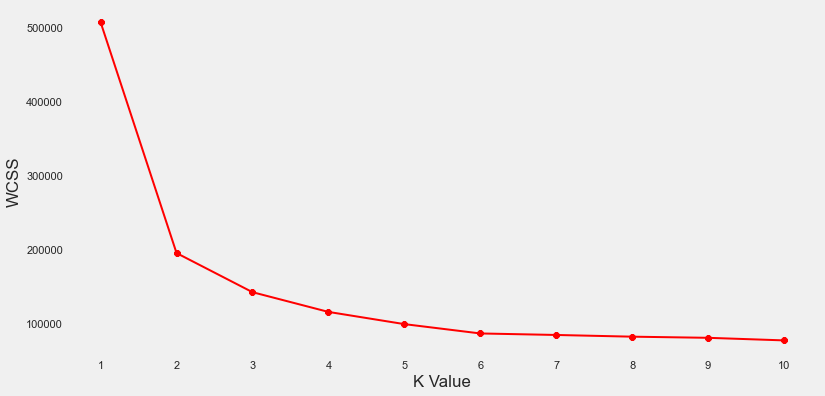

In [171]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_transformed.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.style.use("fivethirtyeight")
plt.show()

In [95]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(X_transformed)
   score = silhouette_score(X_transformed, kmeans.labels_)
   silhouette_coefficients.append(score)

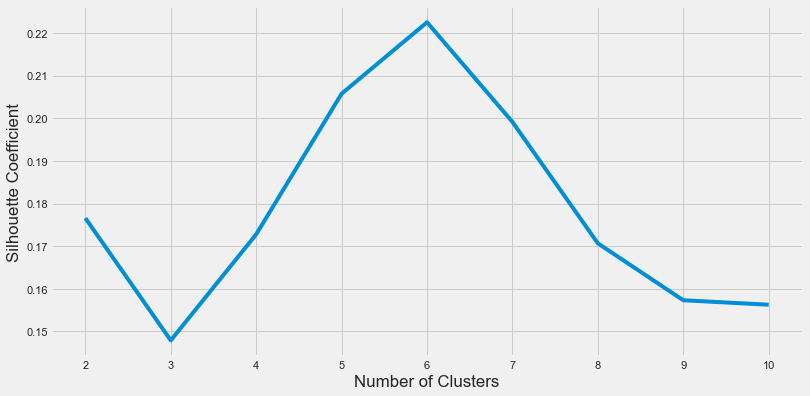

In [170]:
plt.figure(figsize=(12,6))   
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [191]:
n_clusters= 5
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [192]:
x_fit= (clusterer.fit_transform(X_transformed))

predicted_labels = clusterer["kmeans"].labels_

silhouette_score(x_fit, predicted_labels)

0.8919169910246005

In [193]:
pca = PCA(2)
x_pca = pca.fit_transform(x_fit)
x_pca.shape

(58295, 2)

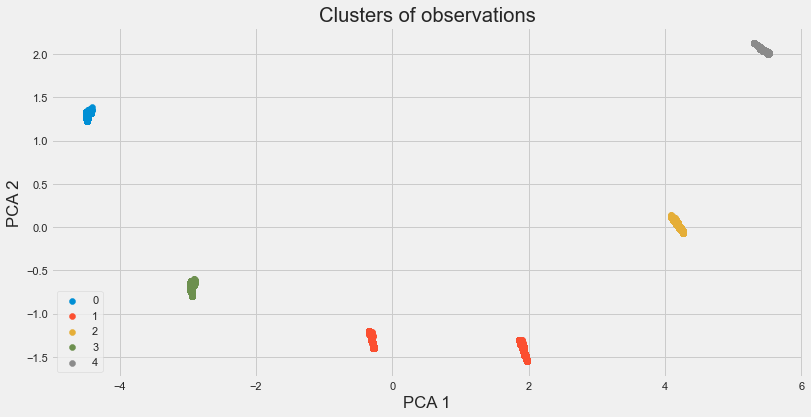

In [194]:
#Getting unique labels
 
u_labels = np.unique(predicted_labels)
 
#plotting the results:
plt.figure(figsize=(12,6))   
plt.style.use("fivethirtyeight")
for i in u_labels:
    plt.scatter(x_pca[predicted_labels == i , 0] , x_pca[predicted_labels == i , 1] , label = i)
plt.legend() 
plt.xlabel ("PCA 1")
plt.ylabel ("PCA 2")
plt.title("Clusters of observations")
plt.show()

In [195]:
X_transformed["Predicted class"]= predicted_labels
df_2= df.reset_index().drop(columns="Date")
df_2= pd.concat((X_transformed, df_2.iloc[:, -5:]), axis=1)

In [196]:
analysis_df = df_2.groupby("Predicted class").sum().drop(columns=["Conversion rate for users", "Conversion rate for sessions", "Bounce rate", "Pageviews per session", " Leads", "Prediction"])
analysis_df

,Direct,Organic Search,Display,Paid Search,Social,(Other),Email,Referral,desktop,mobile,tablet,25-34,35-44,18-24,55-64,45-54,65+,female,male
Predicted class,,,,,,,,,,,,,,,,,,,
0,2338.0,2354.0,1956.0,30.0,2371.0,2253.0,1689.0,434.0,13425.0,0.0,0.0,2415.0,2589.0,2521.0,2355.0,2026.0,1519.0,13425.0,0.0
1,3469.0,3191.0,703.0,13.0,3398.0,2816.0,149.0,391.0,0.0,9492.0,4638.0,1612.0,3181.0,3342.0,2811.0,2194.0,990.0,0.0,14130.0
2,2344.0,2143.0,621.0,22.0,2107.0,2112.0,644.0,848.0,0.0,10841.0,0.0,1678.0,2459.0,2326.0,1898.0,1675.0,805.0,10841.0,0.0
3,2369.0,2365.0,2002.0,17.0,2374.0,2334.0,1488.0,336.0,13285.0,0.0,0.0,2175.0,2543.0,2491.0,2280.0,2057.0,1739.0,0.0,13285.0
4,1406.0,1476.0,523.0,0.0,1743.0,1461.0,0.0,5.0,0.0,0.0,6614.0,699.0,1581.0,1613.0,1464.0,1014.0,243.0,6614.0,0.0


In [212]:
analysis_user_conv = df_2.groupby("Predicted class").sum().sort_values("Conversion rate for users")["Conversion rate for users"].to_frame().round(2)
analysis_user_conv

,Conversion rate for users
Predicted class,
4,152.68
2,282.31
1,300.23
3,377.37
0,393.72


In [213]:
analysis_sess_conv = df_2.groupby("Predicted class").sum().sort_values("Conversion rate for sessions")["Conversion rate for sessions"].to_frame().round(2)
analysis_sess_conv

,Conversion rate for sessions
Predicted class,
4,127.66
2,230.61
1,250.12
3,299.74
0,302.80


In [214]:
analysis_bounce_rate = df_2.groupby("Predicted class").sum().sort_values("Bounce rate")["Bounce rate"].to_frame().round(2)
analysis_bounce_rate

,Bounce rate
Predicted class,
4,3177.17
0,4919.03
2,5137.88
3,5441.72
1,7162.60


In [215]:
analysis_pages_session = df_2.groupby("Predicted class").sum().sort_values("Pageviews per session")["Pageviews per session"].to_frame().round(2)
analysis_pages_session

,Pageviews per session
Predicted class,
4,51726.42
2,64342.53
1,80982.06
3,140286.85
0,174862.42
